<a href="https://colab.research.google.com/github/LilasCorner/jlootbox-data/blob/main/JLootBoxData2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
from numpy import asarray
import pandas as pd
import seaborn as sns

In [2]:
#creating and joining dataframes 

paramsdf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/goodBatchRun/combinedParams.csv")
moneydf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/goodBatchRun/moneySpentOutput.2022.Apr.14.07_30_56.csv")
freqdf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/goodBatchRun/PurchaseFreqOutput.2022.Apr.14.07_30_56.csv")
thresdf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/goodBatchRun/ThresholdOutput.2022.Apr.14.07_30_56.csv")

Lparamsdf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/goodBatchRun/lattice/combinedLParams.csv")
Lmoneydf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/goodBatchRun/lattice/moneySpentOutput.2022.Apr.13.16_44_55.csv")
Lfreqdf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/goodBatchRun/lattice/PurchaseFreqOutput.2022.Apr.13.16_44_55.csv")
Lthresdf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/goodBatchRun/lattice/ThresholdOutput.2022.Apr.13.16_44_55.csv")


mergedmoney = pd.merge(moneydf, paramsdf, how='outer', left_on="run", right_on="run")
mergedfreq = pd.merge(freqdf, paramsdf, how='outer', left_on="run", right_on="run")
mergedthres = pd.merge(thresdf, paramsdf, how='outer', left_on="run", right_on="run")

Lmergedmoney = pd.merge(Lmoneydf, Lparamsdf, how='outer', left_on="run", right_on="run")
Lmergedfreq = pd.merge(Lfreqdf, Lparamsdf, how='outer', left_on="run", right_on="run")
Lmergedthres = pd.merge(Lthresdf, Lparamsdf, how='outer', left_on="run", right_on="run")

#for cases where data was corrupted, drop the rows
# mergedmoney.dropna()
# mergedfreq.dropna()
# mergedthres.dropna()

# print(mergedmoney.head)

<bound method NDFrame.head of        run  tick  moneySpent  randomSeed  stopTime     manip  numPlayers  \
0        1     1         0.0   671967682       500      NONE        1000   
1        1     1         0.0   671967682       500      NONE        1000   
2        1     1         0.0   671967682       500      NONE        1000   
3        1     2         0.0   671967682       500      NONE        1000   
4        1     2         0.0   671967682       500      NONE        1000   
...    ...   ...         ...         ...       ...       ...         ...   
44995   24   499         0.0   671970158       500  BIAS_BOX        1000   
44996   24   499         0.0   671970158       500  BIAS_BOX        1000   
44997   24   500         0.0   671970158       500  BIAS_BOX        1000   
44998   24   500         0.0   671970158       500  BIAS_BOX        1000   
44999   24   500         0.0   671970158       500  BIAS_BOX        1000   

            strat network  
0      ALWAYS_BUY   WATTS  
1

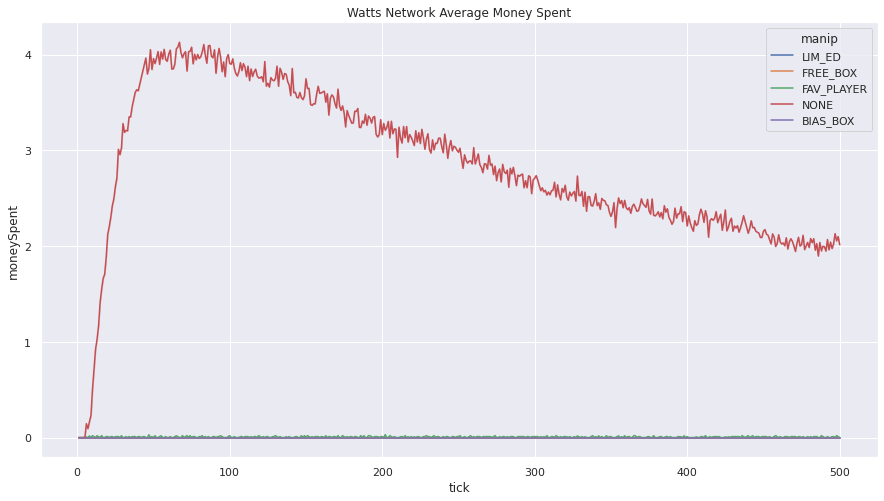

In [15]:
#WATTS

wattmoney = mergedmoney[(mergedmoney['network'] == 'WATTS') & (mergedmoney['strat'] == 'PRICE')]
fig, ax = plt.subplots()

plt.title('Watts Network Average Money Spent')
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=wattmoney['tick'], y=wattmoney['moneySpent'], hue=wattmoney['manip'], markers=True, ax = ax)


Text(0.5, 1.0, 'Watts Network Average Purchase Frequency')

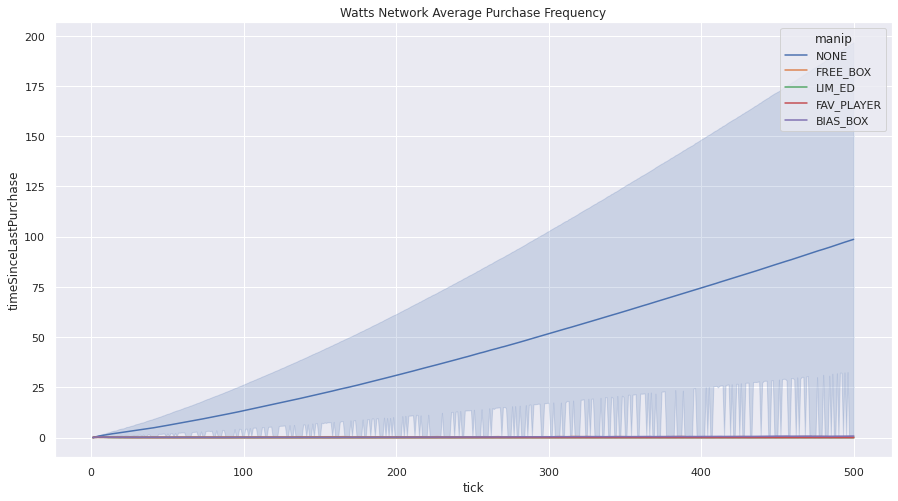

In [4]:
#WATTS
wattfreq = mergedfreq[(mergedfreq['network'] == 'WATTS')]


sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=wattfreq['tick'], y=wattfreq['timeSinceLastPurchase'], hue=wattfreq['manip'], markers=True)

plt.title('Watts Network Average Purchase Frequency')



Text(0.5, 1.0, 'Watts Network Average Buy Threshold')

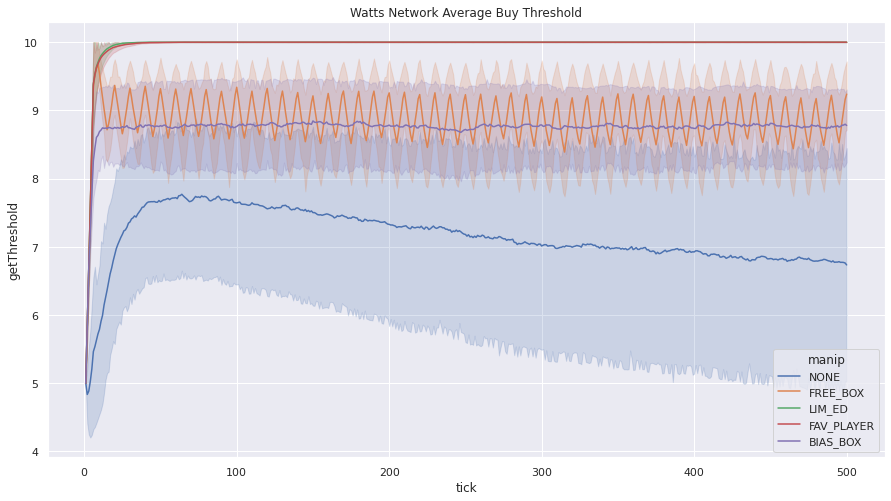

In [5]:
#WATTS
wattthres = mergedthres[(mergedthres['network'] == 'WATTS')]


sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=wattthres['tick'], y=wattthres['getThreshold'], hue=wattthres['manip'], markers=True)



plt.title('Watts Network Average Buy Threshold')

Text(0.5, 1.0, 'Random Density Network Average Money Spent')

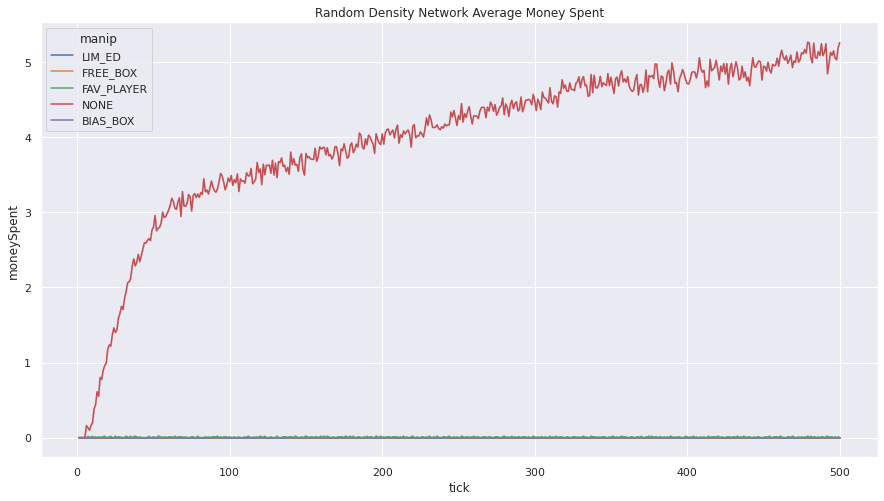

In [6]:
#RANDOM
randommoney = mergedmoney[(mergedmoney['network'] == 'RANDOM') & (mergedmoney['strat'] == 'PRICE')]


sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=randommoney['tick'], y=randommoney['moneySpent'], hue=randommoney['manip'], markers=True)

plt.title('Random Density Network Average Money Spent')

Text(0.5, 1.0, 'Random Density Network Average Purchase Frequency')

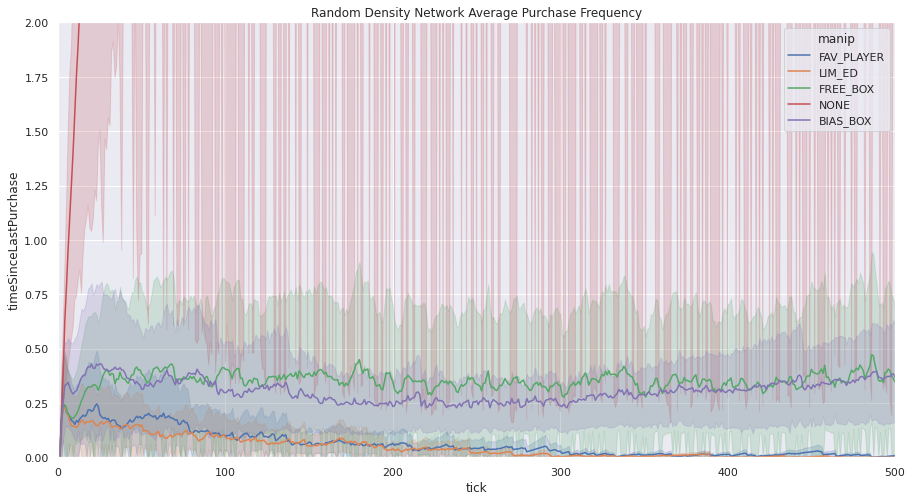

In [7]:
#RANDOM
randomfreq = mergedfreq[(mergedfreq['network'] == 'RANDOM')]
fig, ax = plt.subplots()


sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=randomfreq['tick'], y=randomfreq['timeSinceLastPurchase'], hue=randomfreq['manip'], markers=True, ax = ax)
ax.set_xlim(0, 500)
ax.set_ylim(0, 2)


plt.title('Random Density Network Average Purchase Frequency')

Text(0.5, 1.0, 'Random Density Network Average Buy Threshold')

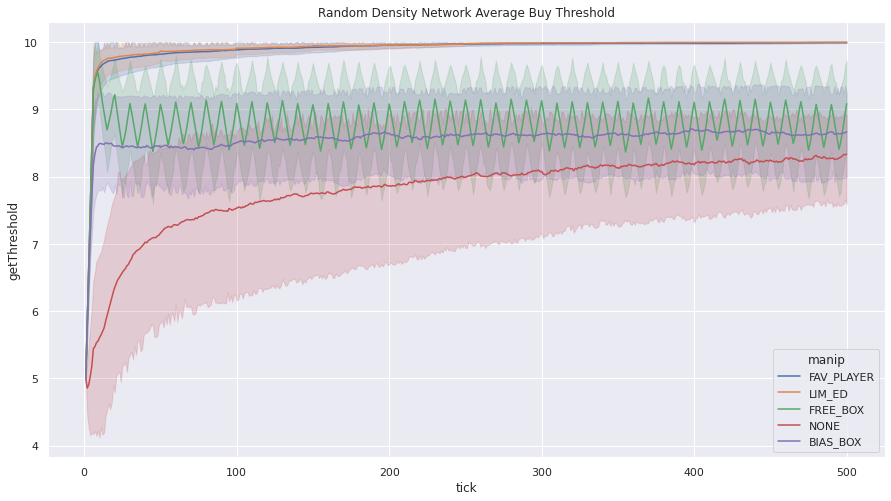

In [8]:
#RANDOM

randomthres = mergedthres[(mergedthres['network'] == 'RANDOM')]


sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=randomthres['tick'], y=randomthres['getThreshold'], hue=randomthres['manip'], markers=True)



plt.title('Random Density Network Average Buy Threshold')

Text(0.5, 1.0, 'Lattice Network Average Money Spent')

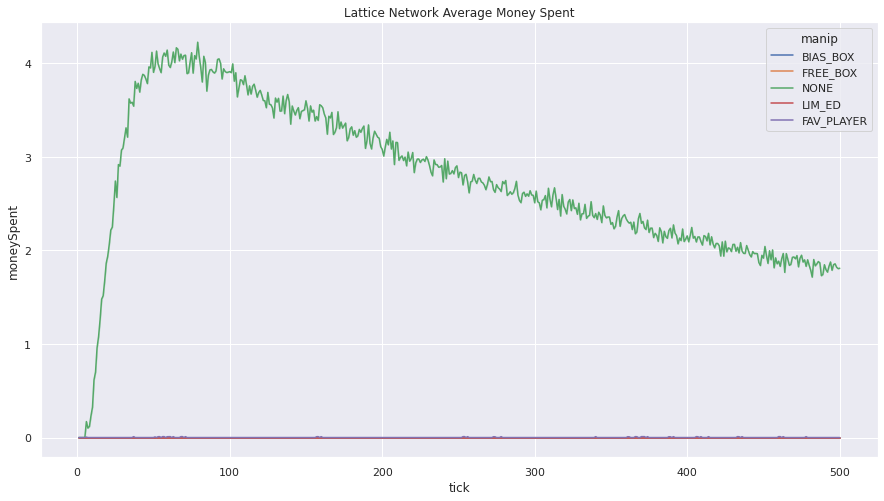

In [12]:
#LATTICE
latticemoney = Lmergedmoney[(Lmergedmoney ['network'] == 'LATTICE') & (Lmergedmoney ['strat'] == 'PRICE')]


sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=latticemoney['tick'], y=latticemoney['moneySpent'], hue=latticemoney['manip'], markers=True)

plt.title('Lattice Network Average Money Spent')

Text(0.5, 1.0, 'Lattice Network Average Purchase Frequency')

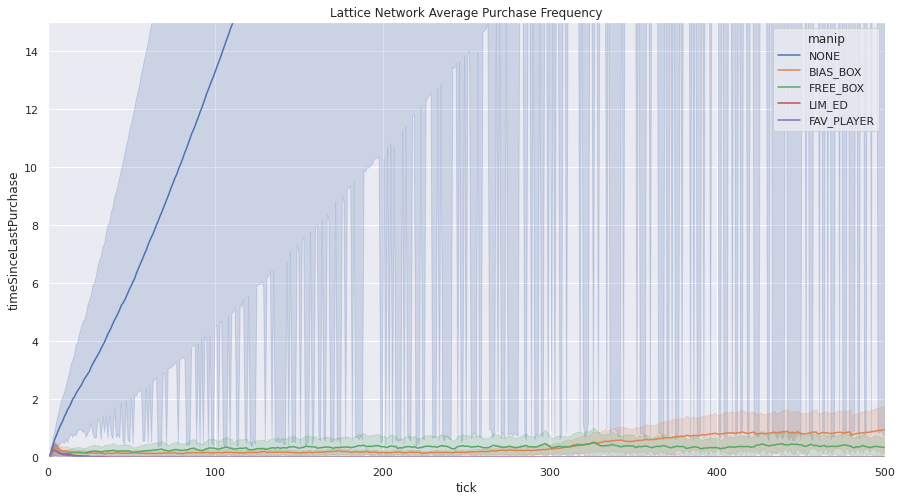

In [13]:
#LATTICE
latticefreq = Lmergedfreq [(Lmergedfreq ['network'] == 'LATTICE')]

fig, ax = plt.subplots()

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=latticefreq['tick'], y=latticefreq['timeSinceLastPurchase'], hue=latticefreq['manip'], markers=True, ax = ax)
ax.set_xlim(0, 500)
ax.set_ylim(0, 15)

plt.title('Lattice Network Average Purchase Frequency')

Text(0.5, 1.0, 'Lattice Network Average Buy Threshold')

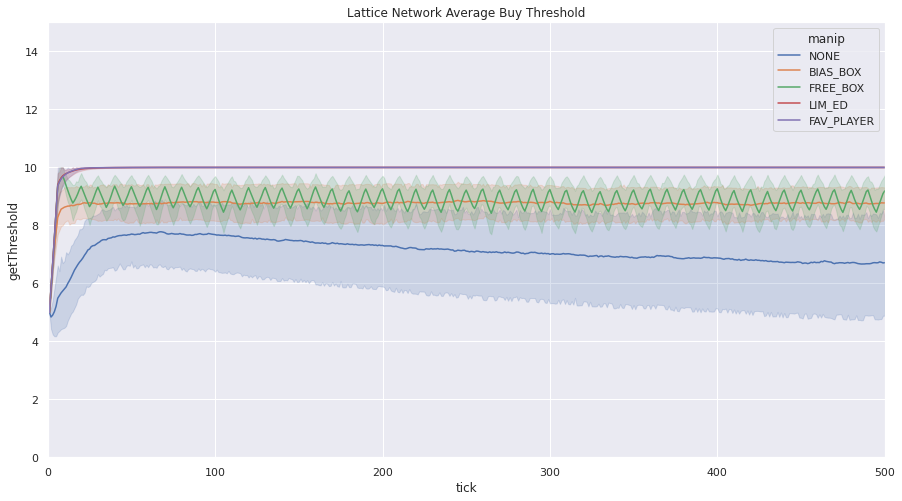

In [14]:
#LATTICE


latticethres = Lmergedthres [(Lmergedthres ['network'] == 'LATTICE')]

fig, ax = plt.subplots()

 
# change the limits of X-axis

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=latticethres['tick'], y=latticethres['getThreshold'], hue=latticethres['manip'], markers=True, ax = ax)
ax.set_xlim(0, 500)
ax.set_ylim(0, 15)


plt.title('Lattice Network Average Buy Threshold')